# Lektion 10

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

## Ebene parametrische Plots

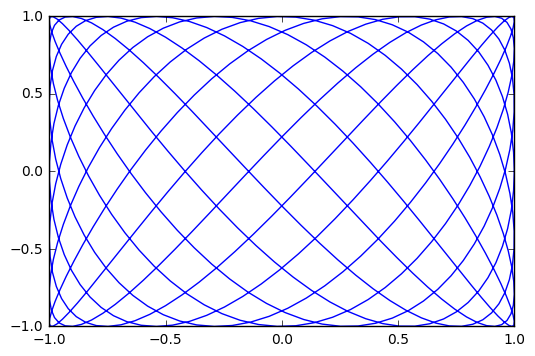

In [2]:
tn = np.linspace(0, 2*np.pi, 550)
plt.plot(np.cos(7*tn), np.sin(11*tn));

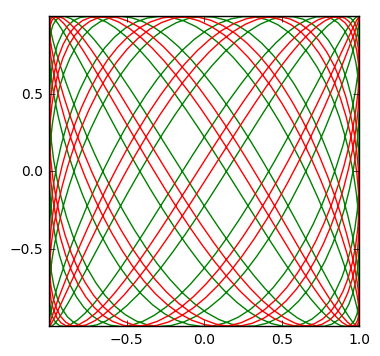

In [3]:
plt.plot(np.cos(7*tn), np.sin(11*tn), 'g')
plt.plot(np.cos(7*tn+.1), np.sin(11*tn), 'r')
plt.axis('image');

Polarplot

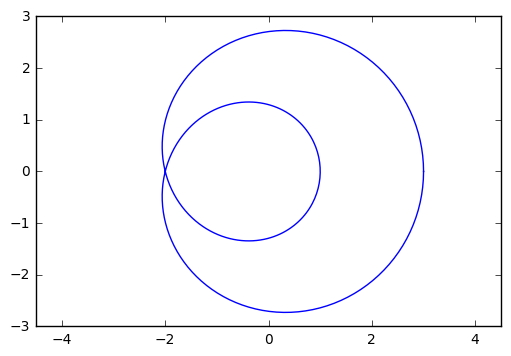

In [4]:
tn = np.linspace(0, 2*np.pi, 250)
r = 2 + np.cos(tn)
phi = 2*tn
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x, y)
plt.axis('equal')

## Polarkoordinaten

In [5]:
x = Symbol('x')
y = Symbol('y')

In [6]:
x1 = 3*cos(pi/6)
y1 = 3*sin(pi/6)

In [7]:
atan(y1/x1)

In [8]:
x2 = 3*cos(-5*pi/6)
y2 = 3*sin(-5*pi/6)

In [9]:
atan(y2/x2)

In [10]:
atan2(y1, x1)

In [11]:
atan2(y2, x2)

In [12]:
tn = np.linspace(-4, 4)
xn = np.cos(tn)
yn = np.sin(tn)
an1 = lambdify(x, atan(x), 'numpy')

In [13]:
an2 = lambdify((y,x), atan2(y,x), 'numpy')

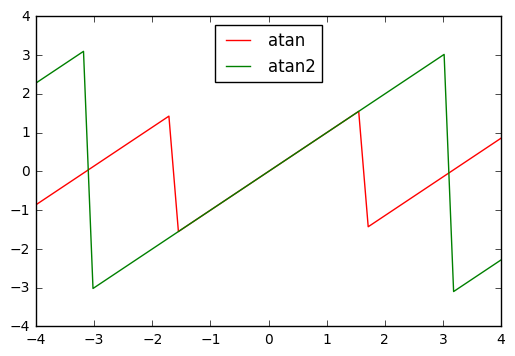

In [14]:
plt.plot(tn, an1(yn/xn), 'r', label='atan')
plt.plot(tn, an2(yn, xn), 'g', label='atan2')
plt.legend(loc='upper center');

## Polygonzüge

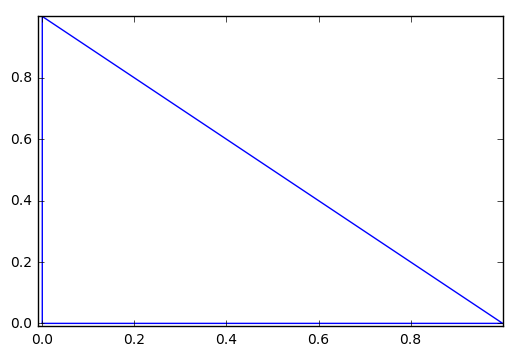

In [15]:
dreieck = [[0,0], [1,0], [0,1], [0,0]]
plt.plot([0,1,0,0], [0,0,1,0])
plt.axis(xmin=-.01,ymin=-.01);

In [16]:
def n_eck(n):
    x = [np.sin(2*np.pi*j/n) for j in range(n+1)]
    y = [np.cos(2*np.pi*j/n) for j in range(n+1)]
    return x, y

In [17]:
n_eck(3)

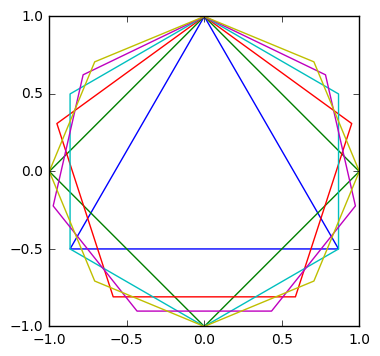

In [18]:
for n in range(3, 9):
    plt.plot(*n_eck(n))  # <- Auspacken
plt.axis('image');

Ohne Auspacken:

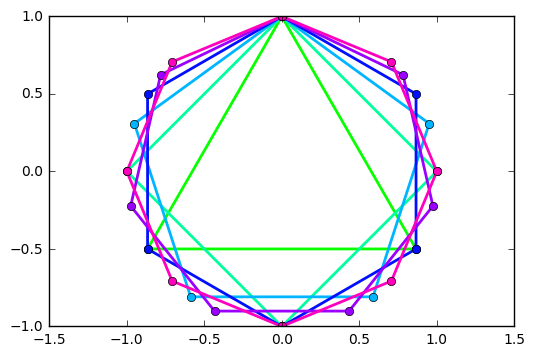

In [24]:
for n in range(3, 9):
    x, y = n_eck(n)
    farbe = plt.cm.hsv(n/9)
    #for i in range(n-2):
    plt.plot(x, y, color=farbe, linewidth=2)
    plt.plot(x, y, 'o', color=farbe)
plt.axis('equal')

In [25]:
farbe

## Datenim- und export

In [26]:
H = Matrix(5, 5, [Rational(1, i+j+1) for i in range(5) for j in range(5)])
H

⎡ 1   1/2  1/3  1/4  1/5⎤
⎢                       ⎥
⎢1/2  1/3  1/4  1/5  1/6⎥
⎢                       ⎥
⎢1/3  1/4  1/5  1/6  1/7⎥
⎢                       ⎥
⎢1/4  1/5  1/6  1/7  1/8⎥
⎢                       ⎥
⎣1/5  1/6  1/7  1/8  1/9⎦

In [27]:
str(H)

'Matrix([[1, 1/2, 1/3, 1/4, 1/5], [1/2, 1/3, 1/4, 1/5, 1/6], [1/3, 1/4, 1/5, 1/6, 1/7], [1/4, 1/5, 1/6, 1/7, 1/8], [1/5, 1/6, 1/7, 1/8, 1/9]])'

In [28]:
srepr(H)

'MutableDenseMatrix([[Integer(1), Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5)], [Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6)], [Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7)], [Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8)], [Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8), Rational(1, 9)]])'

In [29]:
with open('bsp.txt', 'w') as fp:  # w: write
    fp.write(srepr(H) + '\n')

In [30]:
%less bsp.txt

In [31]:
H = []
H

In [32]:
with(open('bsp.txt')) as fp:  # default ist lesen
    text = fp.readline()
text

'MutableDenseMatrix([[Integer(1), Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5)], [Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6)], [Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7)], [Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8)], [Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8), Rational(1, 9)]])\n'

In [33]:
H = S(text)
H

⎡ 1   1/2  1/3  1/4  1/5⎤
⎢                       ⎥
⎢1/2  1/3  1/4  1/5  1/6⎥
⎢                       ⎥
⎢1/3  1/4  1/5  1/6  1/7⎥
⎢                       ⎥
⎢1/4  1/5  1/6  1/7  1/8⎥
⎢                       ⎥
⎣1/5  1/6  1/7  1/8  1/9⎦

In [34]:
x = [Symbol('x_' + str(j+1)) for j in range(5)]

In [35]:
V = Matrix(5, 5, [x[j]**k for k in range(5) for j in range(5)])
V   # Vandermonde Matrix

⎡ 1    1    1    1    1 ⎤
⎢                       ⎥
⎢x₁   x₂   x₃   x₄   x₅ ⎥
⎢                       ⎥
⎢  2    2    2    2    2⎥
⎢x₁   x₂   x₃   x₄   x₅ ⎥
⎢                       ⎥
⎢  3    3    3    3    3⎥
⎢x₁   x₂   x₃   x₄   x₅ ⎥
⎢                       ⎥
⎢  4    4    4    4    4⎥
⎣x₁   x₂   x₃   x₄   x₅ ⎦

In [36]:
with open('bsp.txt', 'a') as fp:   # a: append
    fp.write(srepr(V))

In [37]:
H = []
V = []
H, V

In [38]:
with open('bsp.txt') as fp:
    H = S(fp.readline())
    V = S(fp.readline())

In [39]:
H, V

⎛⎡ 1   1/2  1/3  1/4  1/5⎤, ⎡ 1    1    1    1    1 ⎤⎞
⎜⎢                       ⎥  ⎢                       ⎥⎟
⎜⎢1/2  1/3  1/4  1/5  1/6⎥  ⎢x₁   x₂   x₃   x₄   x₅ ⎥⎟
⎜⎢                       ⎥  ⎢                       ⎥⎟
⎜⎢1/3  1/4  1/5  1/6  1/7⎥  ⎢  2    2    2    2    2⎥⎟
⎜⎢                       ⎥  ⎢x₁   x₂   x₃   x₄   x₅ ⎥⎟
⎜⎢1/4  1/5  1/6  1/7  1/8⎥  ⎢                       ⎥⎟
⎜⎢                       ⎥  ⎢  3    3    3    3    3⎥⎟
⎜⎣1/5  1/6  1/7  1/8  1/9⎦  ⎢x₁   x₂   x₃   x₄   x₅ ⎥⎟
⎜                           ⎢                       ⎥⎟
⎜                           ⎢  4    4    4    4    4⎥⎟
⎝                           ⎣x₁   x₂   x₃   x₄   x₅ ⎦⎠

In [40]:
V.det().factor()

Für den Datenaustausch empfiehlt sich [pandas](http://pandas.pydata.org/).  Installation via
```
conda install pandas
```



## Code in anderen Sprachen

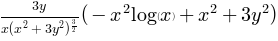

In [41]:
x = Symbol('x')
y = Symbol('y')
f = log(x)*sqrt(x**2+3*y**2)
ddf = f.diff(x,y).simplify()
ddf

In [42]:
octave_code(ddf)

'3*y.*(-x.^2.*log(x) + x.^2 + 3*y.^2)./(x.*(x.^2 + 3*y.^2).^(3/2))'

In [43]:
ccode(ddf)

'3*y*(-pow(x, 2)*log(x) + pow(x, 2) + 3*pow(y, 2))/(x*pow(pow(x, 2) + 3*pow(y, 2), 3.0L/2.0L))'

In [46]:
print(fcode(ddf))

      3*y*(-x**2*log(x) + x**2 + 3*y**2)/(x*(x**2 + 3*y**2)**(3.0d0/
     @ 2.0d0))


In [48]:
print(latex(ddf))

\frac{3 y}{x \left(x^{2} + 3 y^{2}\right)^{\frac{3}{2}}} \left(- x^{2} \log{\left (x \right )} + x^{2} + 3 y^{2}\right)


## Raumkurven

In [49]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
t = Symbol('t')
x = (2-cos(t/6))*cos(t)
y = (2-cos(t/6))*sin(t)
z = t/8
x, y, z

In [51]:
xf = lambdify(t, x, 'numpy')
yf = lambdify(t, y, 'numpy')
zf = lambdify(t, z)

In [52]:
tn = np.linspace(-6*np.pi, 6*np.pi, 230)
xn = xf(tn)
yn = yf(tn)
zn = zf(tn)

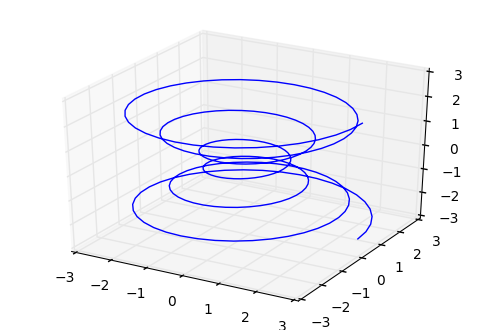

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xn, yn, zn);

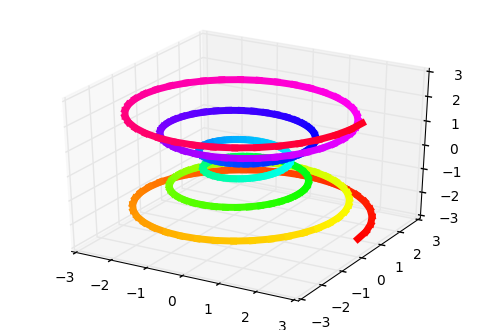

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(tn)-1):
    ax.plot(xn[i:i+2], yn[i:i+2], zn[i:i+2], 
            color=plt.cm.hsv(float(i)/len(tn)),
            linewidth=5);

Trick aus http://stackoverflow.com/questions/15617207/line-colour-of-3d-parametric-curve-in-pythons-matplotlib-pyplot

## Flächen im Raum

In [55]:
t = Symbol('t', real=True)
s = Symbol('s', real=True)

In [56]:
profil = (1-t**2)/2

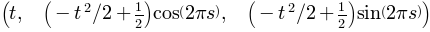

In [57]:
x = t
y = cos(2*pi*s)*profil
z = sin(2*pi*s)*profil
w = cos(16*s)**4 * cos(16*t)**4  # Funktion mit Werten
                                 # in [0,1] für die Färbung
x, y, z

In [58]:
xf = lambdify((s, t), x)
yf = lambdify((s, t), y, 'numpy')
zf = lambdify((s, t), z, 'numpy')
wf = lambdify((s, t), w, 'numpy')

In [59]:
tn = np.linspace(-1, 1, 201)
sn = np.linspace(-1, 1, 201)
S, T = np.meshgrid(sn, tn)

In [60]:
X = xf(S, T)
Y = yf(S, T)
Z = zf(S, T)
W = wf(S, T)

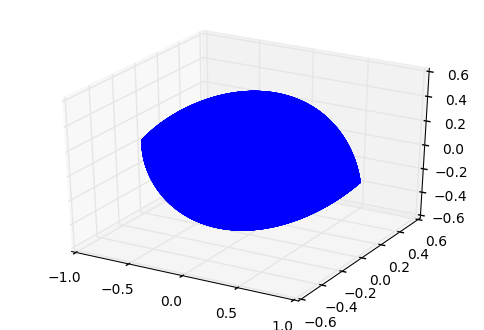

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z);

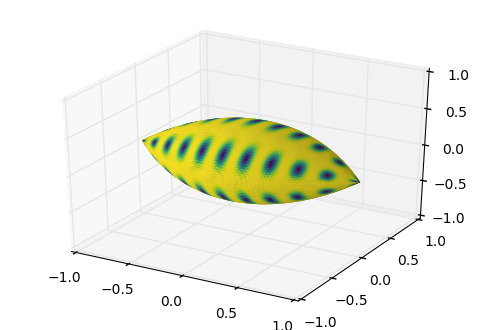

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
               linewidth=0, facecolors=plt.cm.viridis(1-W))
ax.auto_scale_xyz([-1,1], [-1,1], [-1,1]);

## Vektorfelder

In [63]:
xn = np.linspace(-1, 1, 12)
yn = xn
X, Y = np.meshgrid(xn, yn)
U = X/np.sqrt(X**2+Y**2)
V = Y/np.sqrt(X**2+Y**2)

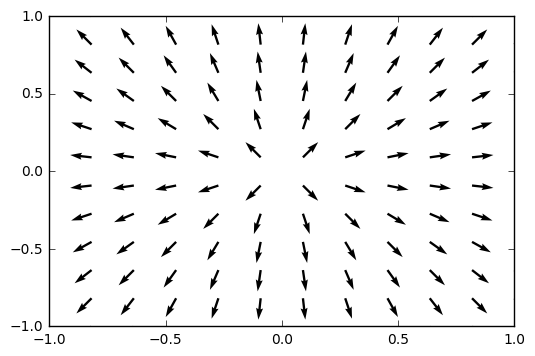

In [64]:
plt.quiver(X, Y, U, V);

In [65]:
N = (X**2+Y**2)**(0.3)  # Längenunterschiede werden vermindert

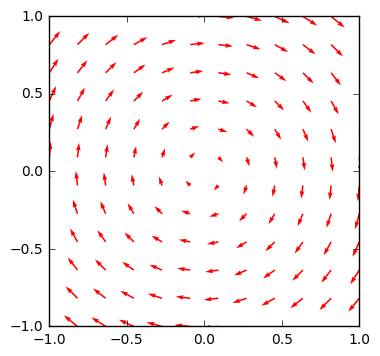

In [66]:
plt.quiver(X, Y, Y/N, -X/N, color='red')
plt.axis('image');